# Desarrollo

In [28]:
# ACTIVIDAD 2 <a class="anchor" id="Actividad2"></a>

## Preguntas:
* [a](#a)
* [b](#b)
* [c](#c)
* [d](#d)
* [e](#e)
* [f](#f)
* [g](#g)
* [h](#h)
* [i](#i)
* [j](#j)
* [k](#k)
* [l](#l)
* [m](#m)
* [n](#n)
* [o](#o)
* [p](#p)
* [q](#p)
* [r](#p)
* [s](#s)
* [t](#t)
* [u](#u)
* [v](#v)
* [Actividad 2](#Actividad2)

Cargar datos y agregar columna a predecir. Se elimina la ultima fila ya que no tiene valor a predecir

In [29]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

In [30]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000


Extracción de información a partir de la fecha

In [31]:
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

Matrices de entrenamiento con alietoriedad en training set para evitar orden natural

In [32]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

# a)<a class="anchor" id="a"></a>

In [33]:
df

,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,5,2013,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1456,16.850000,67.550000,8.335000,1017.200000,1,2016,12,0,0,0,1
1457,17.217391,68.043478,3.547826,1015.565217,2,2016,12,0,0,0,1
1458,15.238095,87.857143,6.000000,1016.904762,3,2016,12,0,0,0,1
1459,14.095238,89.666667,6.266667,1017.904762,4,2016,12,0,0,0,1


El problema a resolver es el de predecir la temperatura media de un dia basandonos en caracteristicas del clima del dia anterior. Para ello contamos con datos de la ciudad de Dehli de India que se comportan de la siguiente forma

In [34]:
import matplotlib.pyplot as plt
import numpy as np

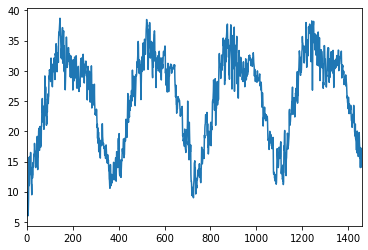

In [35]:
df["meantemp"].plot()

Se pueden apreciar 4 peaks de temperaturas altas y bajas que porbablemente corresponden con fechas en temporadas de verano e invierno respectivamente, por lo que las temperaturas intermedias entre estos peaks corresponderian a fechas de temporadas de otoño y primavera

In [36]:
#df["month"].unique()

In [37]:
#df["year"].unique()

In [38]:
xt = []
for i in df["year"].unique():
    for j in df["month"].unique():
        xt.append(str(i)+"/"+str(j))

UsageError: Line magic function `%` not found.


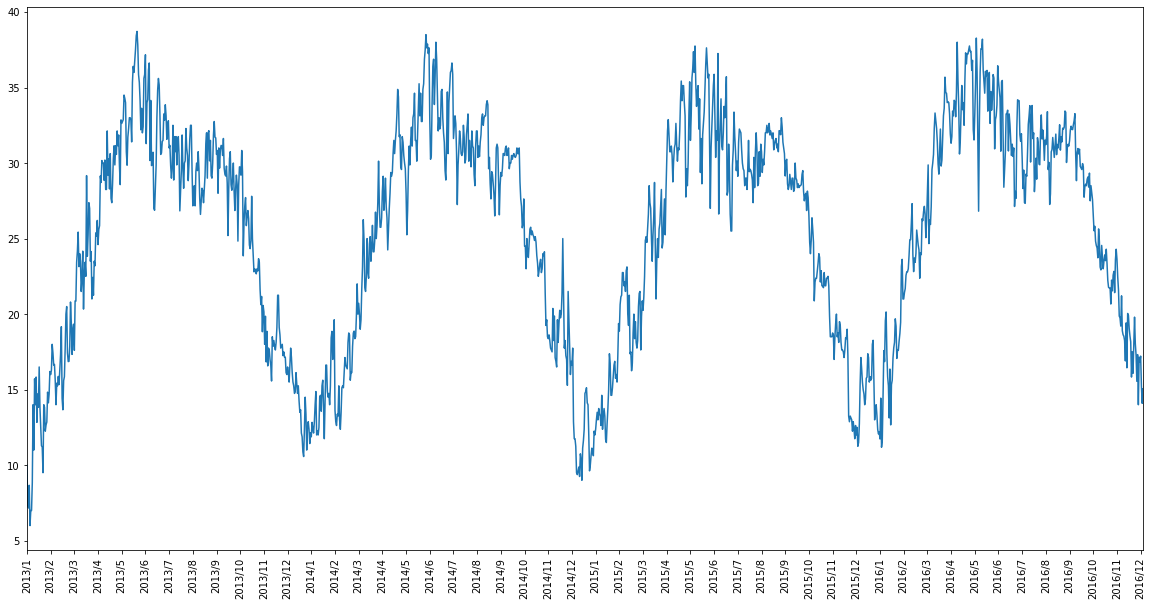

In [39]:
plt.figure(figsize=(20,10))
df["meantemp"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90) #steps de 31 por separacion entre meses


UsageError: Line magic function `%` not found.


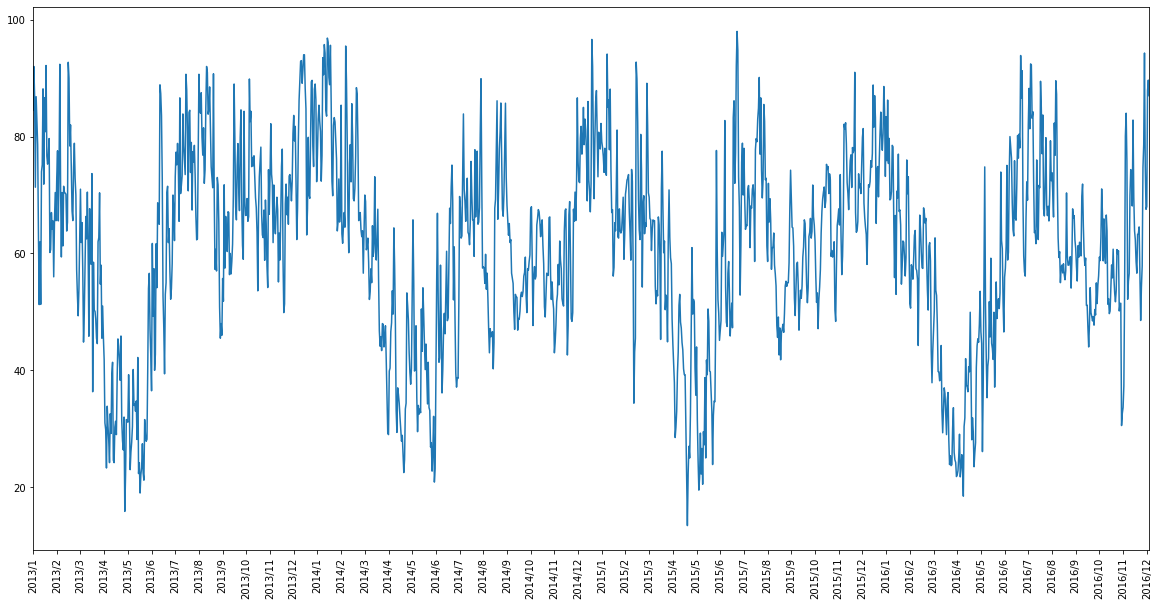

In [40]:
plt.figure(figsize=(20,10))
df["humidity"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90)


UsageError: Line magic function `%` not found.


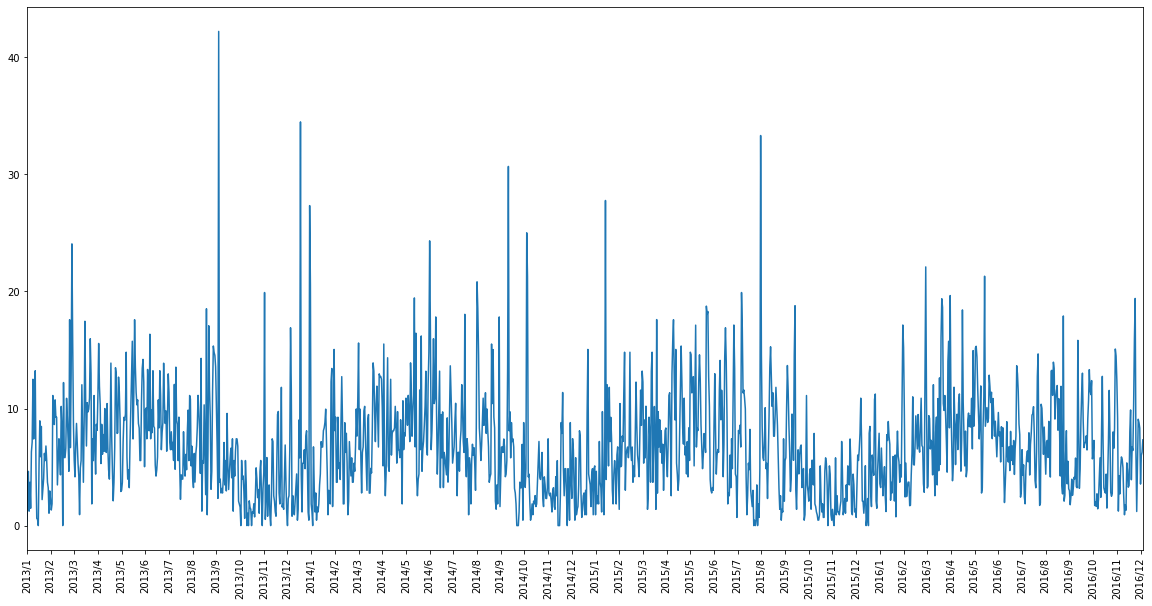

In [41]:
plt.figure(figsize=(20,10))
df["wind_speed"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90)


UsageError: Line magic function `%` not found.


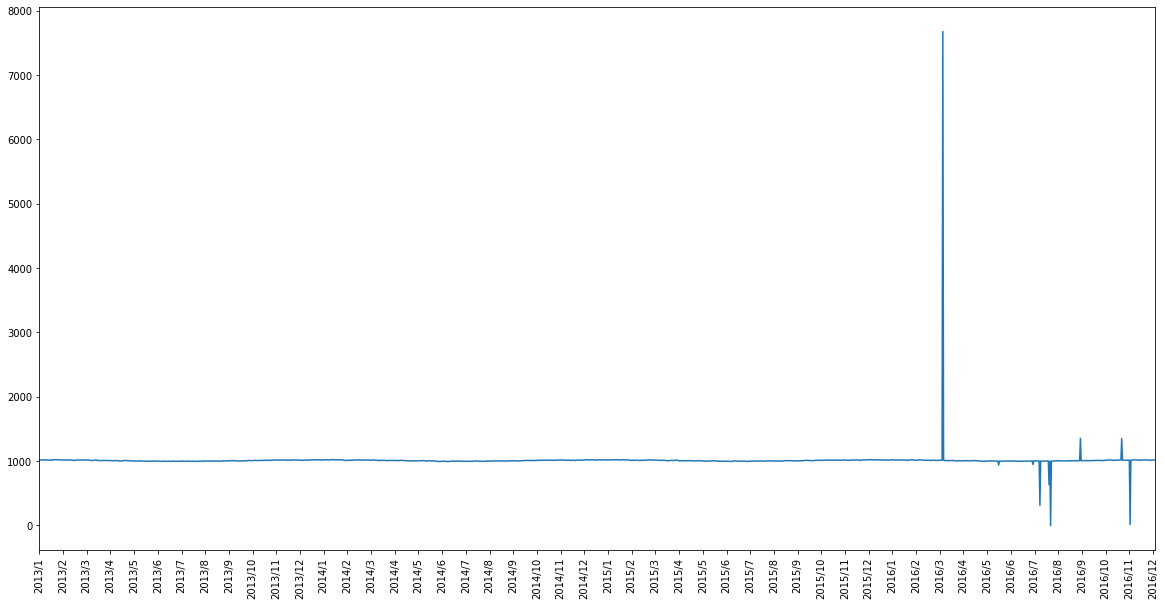

In [42]:
plt.figure(figsize=(20,10))
df["meanpressure"].plot()
plt.xticks(np.arange(0, 1461, step=31), xt, rotation=90)


Es posible apreciar que la presion media se mantiene constante a lo largo de los años hasta llegar al verano del 2015 donde se produce un peak de temperatura inesperado. Dicho peak, y los posteriores, pueden ser un outliers de los cuales hay que preocuparse al momento de realizar el entrenamiento del modelo mas adelante

Utilizar la informacion del dia anterior puede no ser suficiente para predecir la del dia siguiente dado que existen variaciones muy bruscas de temperaturas entre algunos dias, sobre todo cuando se produce el cambio de estaciones. Esto puede apreciarse por ejemplo en el periodo de abril-mayo del 2013, por lo que es probable que se requiera informacion historica para realizar la predicción

# b) <a class="anchor" id="b"></a>

In [43]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)
... #define your regularized tree model

Ellipsis

In [44]:
model_r = Tree(max_depth = 10, min_samples_split = 7)
model_r.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

La ventaja del decision tree en este problema viene dada por el numero de dimensiones que se consideran, ya que al aumentar el numero de dimensiones el problema se vuelve NP-Hard y por tanto tomaria demasiado tiempo su ejecucion.

La ventaja en el escalado se produce debido a que el arbol no realiza ajustes de peso como por ejemplo lo hace un regresor logistico y por lo tanto no se ve influenciado por la magnitud de los datos.

# c) <a class="anchor" id="c"></a>

### No Regularizado

RMSE train=  0.0
RMSE val=  2.5583243305205445


<Figure size 1440x720 with 0 Axes>

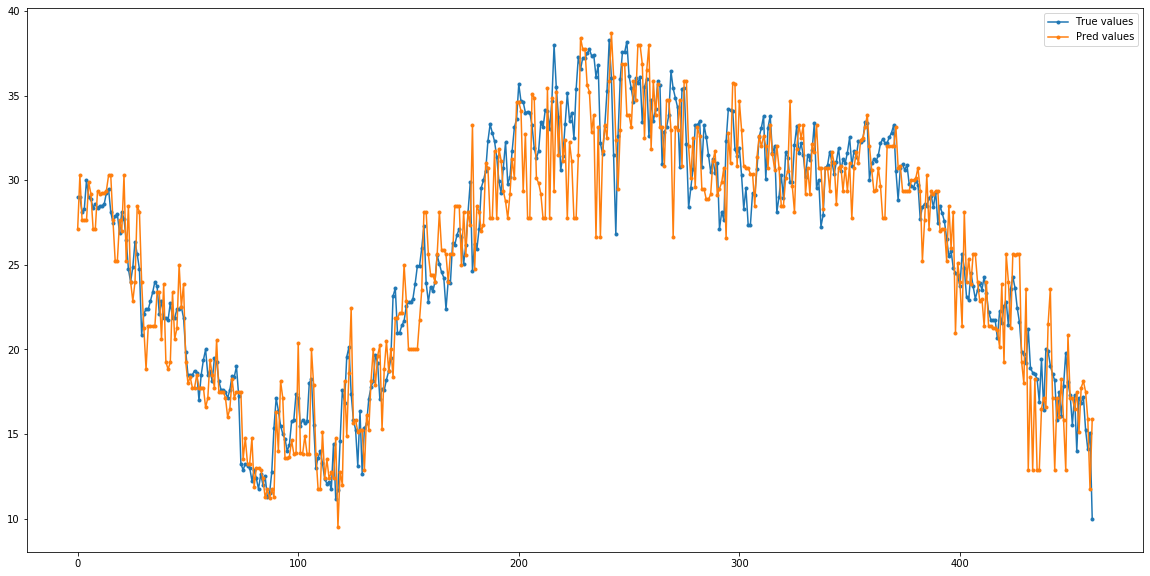

In [49]:
plt.figure(figsize=(20,10))
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

### Regularizado

RMSE train=  0.9755999038504851
RMSE val=  2.2157467490385114


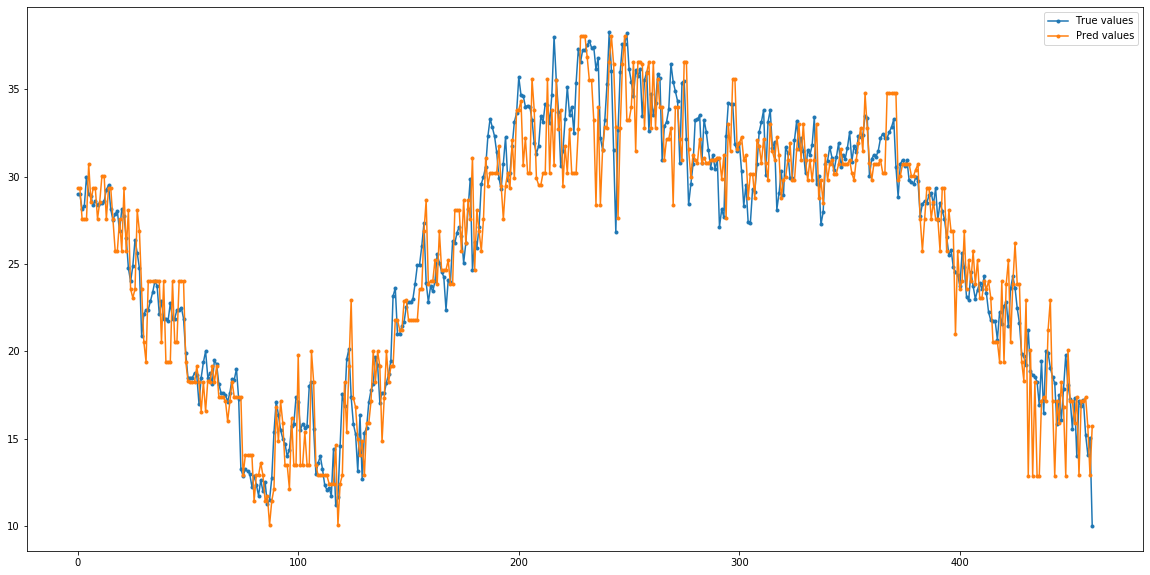

In [48]:
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

Se puede apreciar en ambos tipos de modelos que no hay una variacion muy grande respeco al RMSE y en cuanto a lo observable en los graficos, el desempeño se aprecia diferente en ciertos puntos donde el modelo no regularizado obtiene mejores resultados y otros donde el regularizado se comporta mejor.

Puede ser que al variar los parametros del modelo regularizado se obtenga una diferencia mas notoria

RMSE train=  1.183861477354968
RMSE val=  1.956985064691974


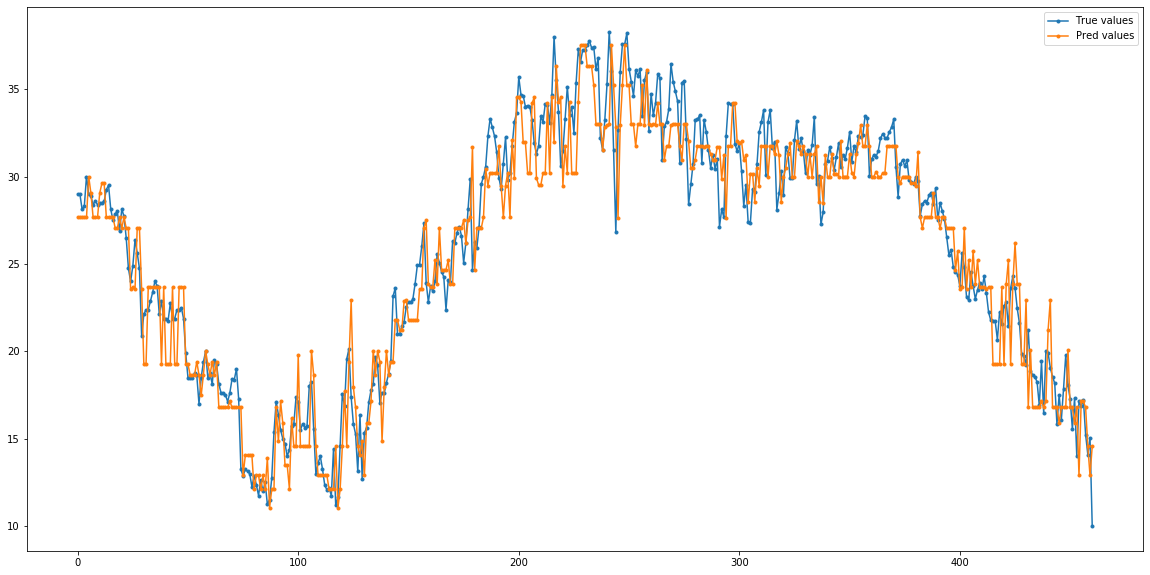

In [54]:
model_r = Tree(max_depth = 25, min_samples_split = 20)
model_r.fit(X_train, y_train)
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

En esta caso, donde se aumento la altura y la cantidad minima de datos para una separacion, se logra apreciar una disminucion considerable en el RMSE del validation set. No asi en el train set donde se produ